In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
IMG_WIDTH = 20
IMG_HEIGHT = 20

In [3]:
# Lets assume a square window located at top_left with a size window_size
window_size = 5
top_left = (2, 12)

In [4]:
# Creates top-sorrounding rows
top_rows = tf.ones(shape=(top_left[0], IMG_WIDTH))

In [5]:
print(top_rows.shape)

(2, 20)


In [6]:
# Creates rows with the zeros
middle_rows = tf.repeat(
    tf.concat(values=(
        tf.ones(shape=(1, top_left[1])),
        tf.zeros(shape=(1, min(IMG_WIDTH - top_left[1], window_size))),
        tf.ones(shape=(1, max(IMG_WIDTH - top_left[1] - window_size, 0)))
    ), axis=1),
    repeats=[min(IMG_WIDTH - top_left[1], window_size)], axis=0
)

In [7]:
print(middle_rows.numpy())
print(middle_rows.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]]
(5, 20)


In [8]:
# Creates bottom-sorrounding rows
bottom_rows = tf.ones(shape=(max(IMG_HEIGHT - top_left[0] - window_size, 0), IMG_WIDTH))

In [9]:
print(bottom_rows.shape)

(13, 20)


In [10]:
mask = tf.concat(
    values=(
        top_rows,
        middle_rows,
        bottom_rows
    ),
    axis=0                
)

In [11]:
print(mask.numpy())

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

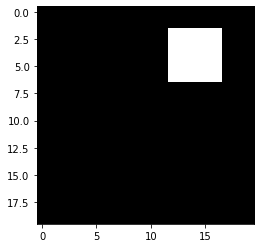

In [12]:
plt.imshow(mask, cmap='binary')